## Laden der Relevanten Packages, Aufsetzen des Policy-Environments

In [1]:
import pandas as pd
import numpy as np
import copy

from itertools import product

import matplotlib.pyplot as plt

from gettsim import set_up_policy_environment
from gettsim import compute_taxes_and_transfers
from gettsim import grundrente

from gettsim import ROOT_DIR

policy_params, policy_functions = set_up_policy_environment("2020")

## Ergänzen des Policy-Environments um Funktionen für Grundrente

In [2]:
functions = "gettsim.grundrente.grundrente"
functions

'gettsim.grundrente.grundrente'

## Erstellen eines Datensatzes, der in den Entgeltpunkten variiert

In [3]:
data_4a = pd.DataFrame(index=pd.RangeIndex(100))
data_4a["hh_id"] = data_4a.index
data_4a["wohnort_ost"] = False
data_4a["entgeltpunkte"] = np.linspace(0.1, 50, 100)
data_4a["grundrentenbewertungszeiten"] = (((data_4a["entgeltpunkte"]/0.3) * 12).clip(upper=480)).apply(np.floor)
data_4a["entgeltpunkte_grundrente"] = data_4a["entgeltpunkte"]
data_4a["bruttolohn_m"] = 0
data_4a["alter"] = 65
data_4a["geburtsjahr"] = 2020 - data_4a["alter"]
data_4a["grundrentenzeiten"] = 480


data_4a.head()

,hh_id,wohnort_ost,entgeltpunkte,grundrentenbewertungszeiten,entgeltpunkte_grundrente,bruttolohn_m,alter,geburtsjahr,grundrentenzeiten
0,0,False,0.100000,4.0,0.100000,0,65,1955,480
1,1,False,0.604040,24.0,0.604040,0,65,1955,480
2,2,False,1.108081,44.0,1.108081,0,65,1955,480
3,3,False,1.612121,64.0,1.612121,0,65,1955,480
4,4,False,2.116162,84.0,2.116162,0,65,1955,480


## Berechne Ergebnisse für Datensatz

In [4]:
ergebnis = compute_taxes_and_transfers(
    data = data_4a,
    params = policy_params,
    targets = ["rente_anspr_m", "grundsicherung_im_alter_2020", "grundsicherung", "grundrente1", "anzurechnende_rente", "durchschnittl_entgeltpunkte_grundrente"],
    functions = [policy_functions, functions]
    )

ergebnis.head()


,anzurechnende_rente,durchschnittl_entgeltpunkte_grundrente,grundrente1,grundsicherung,grundsicherung_im_alter_2020,rente_anspr_m
0,0.00000,0.025000,2.822470,932.00000,928.774320,3.225680
1,0.00000,0.025168,17.048859,932.00000,912.515589,19.484411
2,0.00000,0.025184,31.275248,932.00000,896.256859,35.743141
3,0.00000,0.025189,45.501638,932.00000,879.998128,52.001872
4,19.59204,0.025192,59.728027,912.40796,863.739398,68.260602


## Daten ordnen, Vorbereitung zur Visualisierung

In [5]:
data_4a["ergebnis_2020"] = ergebnis["rente_anspr_m"] + ergebnis["grundsicherung_im_alter_2020"]
data_4a["ergebnis_2021"] = ergebnis["rente_anspr_m"] + ergebnis["grundrente1"] + ergebnis["grundsicherung"]
data_4a["Absolute Änderung"] = data_4a["ergebnis_2021"] - data_4a["ergebnis_2020"]
data_4a["Entgeltpunkte pro Jahr"] = data_4a["entgeltpunkte"] / 40
data_4a["rente_anspr_m"] = ergebnis["rente_anspr_m"]

## Abb.1: Komponenten Einkommen

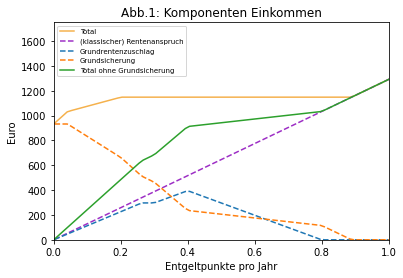

In [6]:
plt.plot(data_4a["Entgeltpunkte pro Jahr"], data_4a["ergebnis_2021"], label="Total", color='#F5B14C')
plt.plot(data_4a["Entgeltpunkte pro Jahr"], data_4a["rente_anspr_m"], "--", label="(klassischer) Rentenanspruch", color='#9D2EC5')
plt.plot(data_4a["Entgeltpunkte pro Jahr"], ergebnis["grundrente1"], "--", label="Grundrentenzuschlag")
plt.plot(data_4a["Entgeltpunkte pro Jahr"], ergebnis["grundsicherung"], "--", label="Grundsicherung")
plt.plot(data_4a["Entgeltpunkte pro Jahr"], ergebnis["rente_anspr_m"] + ergebnis["grundrente1"] , label="Total ohne Grundsicherung")

plt.xlabel("Entgeltpunkte pro Jahr")
plt.ylabel("Euro")
plt.title("Abb.1: Komponenten Einkommen")

plt.xlim(0, 1)
plt.ylim(0, 1750)


plt.legend(loc=2, prop={'size': 7})
plt.show()


## Abb. 2: 2020 vs. 2021

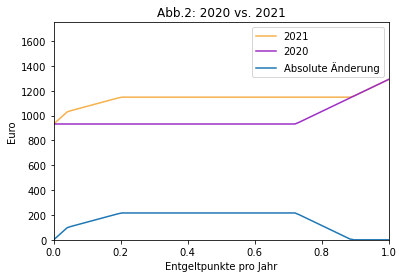

In [7]:
plt.plot(data_4a["Entgeltpunkte pro Jahr"], data_4a["ergebnis_2021"], label="2021", color='#F5B14C')
plt.plot(data_4a["Entgeltpunkte pro Jahr"], data_4a["ergebnis_2020"], label="2020", color='#9D2EC5')
plt.plot(data_4a["Entgeltpunkte pro Jahr"], data_4a["Absolute Änderung"],label="Absolute Änderung")

plt.xlabel("Entgeltpunkte pro Jahr")
plt.ylabel("Euro")
plt.title("Abb.2: 2020 vs. 2021")

plt.xlim(0, 1)
plt.ylim(0, 1750)

plt.legend()
plt.show()

## Abb.3: Bedeutung des Grundrentenzuschlags

In [8]:
data_4a_modified = data_4a
data_4a_modified["grundrente1"] = 0
data_4a_modified = data_4a_modified.astype({"grundrente1": float})
data_4a_modified = data_4a_modified.drop(columns = ["rente_anspr_m", "ergebnis_2020", "ergebnis_2021", 
                                                    "Absolute Änderung", "Entgeltpunkte pro Jahr"])

data_4a_modified.head()

,hh_id,wohnort_ost,entgeltpunkte,grundrentenbewertungszeiten,entgeltpunkte_grundrente,bruttolohn_m,alter,geburtsjahr,grundrentenzeiten,grundrente1
0,0,False,0.100000,4.0,0.100000,0,65,1955,480,0.0
1,1,False,0.604040,24.0,0.604040,0,65,1955,480,0.0
2,2,False,1.108081,44.0,1.108081,0,65,1955,480,0.0
3,3,False,1.612121,64.0,1.612121,0,65,1955,480,0.0
4,4,False,2.116162,84.0,2.116162,0,65,1955,480,0.0


In [9]:
ergebnis_ohne_zuschlag = compute_taxes_and_transfers(
data = data_4a_modified,
params = policy_params,
columns_overriding_functions= ["grundrente1"],
targets = ["rente_anspr_m", "grundsicherung_im_alter_2020", "grundsicherung", "anzurechnende_rente"],
functions = [policy_functions, functions]
)
ergebnis_ohne_zuschlag = ergebnis_ohne_zuschlag.replace(np.nan, 0)

In [10]:
data_4a_modified["ohne Rentenzuschlag"] = ergebnis_ohne_zuschlag["grundsicherung"] + ergebnis_ohne_zuschlag["rente_anspr_m"] 

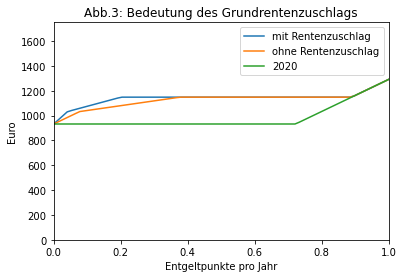

In [11]:
plt.plot(data_4a["Entgeltpunkte pro Jahr"], data_4a["ergebnis_2021"], label="mit Rentenzuschlag")
plt.plot(data_4a["Entgeltpunkte pro Jahr"], data_4a_modified["ohne Rentenzuschlag"] , label="ohne Rentenzuschlag")
plt.plot(data_4a["Entgeltpunkte pro Jahr"], data_4a["ergebnis_2020"], label="2020")

plt.xlabel("Entgeltpunkte pro Jahr")
plt.ylabel("Euro")
plt.title("Abb.3: Bedeutung des Grundrentenzuschlags")

plt.xlim(0, 1)
plt.ylim(0, 1750)


plt.legend()
plt.show()

## Abb.4: Bedeutung des Freibetrags

In [12]:
data_4a_modified2 = data_4a
data_4a_modified2 = data_4a_modified2.drop(columns = ["rente_anspr_m", "grundrente1", "ergebnis_2020", "ergebnis_2021", 
                                                    "Absolute Änderung", "Entgeltpunkte pro Jahr"])
data_4a_modified2.head()

,hh_id,wohnort_ost,entgeltpunkte,grundrentenbewertungszeiten,entgeltpunkte_grundrente,bruttolohn_m,alter,geburtsjahr,grundrentenzeiten
0,0,False,0.100000,4.0,0.100000,0,65,1955,480
1,1,False,0.604040,24.0,0.604040,0,65,1955,480
2,2,False,1.108081,44.0,1.108081,0,65,1955,480
3,3,False,1.612121,64.0,1.612121,0,65,1955,480
4,4,False,2.116162,84.0,2.116162,0,65,1955,480


In [13]:
ergebnis_ohne_freibetrag = compute_taxes_and_transfers(
data = data_4a_modified2,
params = policy_params,
targets = ["rente_anspr_m", "grundrente1"],
functions = [policy_functions, functions]
)
ergebnis_ohne_freibetrag
ergebnis_ohne_freibetrag["Grundsicherung"] = ((500 + 432) - ergebnis_ohne_freibetrag["grundrente1"] - ergebnis_ohne_freibetrag["rente_anspr_m"]).clip(lower=0)
ergebnis_ohne_freibetrag["ohne Freibetrag"] = ergebnis_ohne_freibetrag["Grundsicherung"] + ergebnis_ohne_freibetrag["grundrente1"] + ergebnis_ohne_freibetrag["rente_anspr_m"]

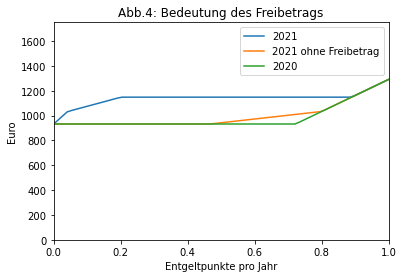

In [14]:
plt.plot(data_4a["Entgeltpunkte pro Jahr"], data_4a["ergebnis_2021"], label="2021")
plt.plot(data_4a["Entgeltpunkte pro Jahr"], ergebnis_ohne_freibetrag["ohne Freibetrag"] , label="2021 ohne Freibetrag")
plt.plot(data_4a["Entgeltpunkte pro Jahr"], data_4a["ergebnis_2020"], label="2020" )

plt.xlabel("Entgeltpunkte pro Jahr")
plt.ylabel("Euro")
plt.title("Abb.4: Bedeutung des Freibetrags")


plt.xlim(0, 1)
plt.ylim(0, 1750)

plt.legend()
plt.show()